In [ ]:
import pandas as pd

# Load the data
file_path = '/content/cleaned_text(1).csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


                                cleaned_text
0  love well made sturdi comfort love pretti
1   love great upgrad origin mine coupl year
2     pillow save back love look feel pillow
3        miss inform use great product price
4        nice set good qualiti set two month


In [ ]:
# Extract the text column
corpus = df['cleaned_text'].tolist()  # Replace 'processed_text' with your column name
print(f"Number of documents: {len(corpus)}")


Number of documents: 40431


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')  # Limit vocabulary size
tokenizer.fit_on_texts(corpus)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(corpus)

# Pad the sequences
max_length = 200  # Maximum length of input
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Check the padded sequences
print(f"Padded sequences shape: {padded_sequences.shape}")


Padded sequences shape: (40431, 200)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your features and target variable 'topic'
X = padded_sequences  # Features (padded sequences)
y = df['cleaned_text']  # Assuming 'topic' is your target variable column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (32344, 200), Test set size: (8087, 200)


In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

# Determine the number of topics (assuming labels are integers starting from 0)
num_topics = len(set(y_train))  # Calculate the unique topic labels in y_train

vocab_size = 10000  # Set this to the size of your vocabulary
embedding_dim = 100

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=False),  # LSTM layer with 128 units
    Dropout(0.3),                       # Dropout to prevent overfitting
    Dense(64, activation='relu'),       # Fully connected layer
    Dropout(0.3),
    Dense(num_topics, activation='softmax')  # Output layer for topic classification
])

# Compile the model (use sparse_categorical_crossentropy for integer labels)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

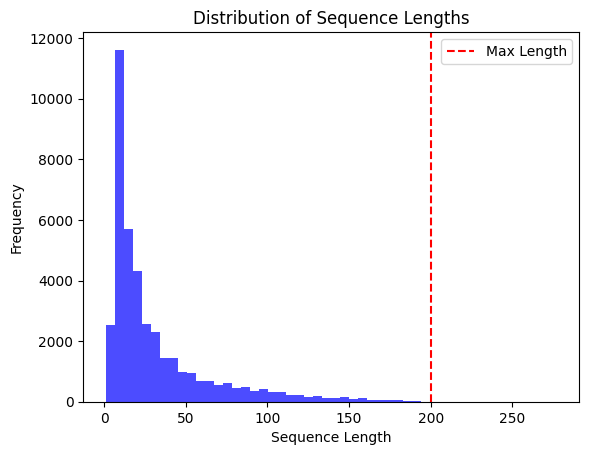

In [ ]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in sequences]
plt.hist(sequence_lengths, bins=50, color='blue', alpha=0.7)
plt.axvline(x=max_length, color='red', linestyle='--', label='Max Length')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The graph shows the distribution of sequence lengths in the corpus before padding. Key insights:

    Majority of Sequences are Short: Most sequences have lengths below 50 tokens, indicating a skewed distribution with shorter text dominating.
    Chosen Max Length (200): The red dashed line indicates that max_length=200 is sufficient to cover almost all sequences, with minimal truncation of longer sequences.

This ensures that the padding strategy balances computational efficiency while retaining relevant information.